In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.3.0


## Let's load the dataset using keras datasets 

In [ ]:
dataset = tf.keras.datasets.mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = dataset.load_data()
X_train, X_test = X_train/255.0 , X_test/255.0

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

In [ ]:
N, D = X_train.shape

In [ ]:
i_layer = Input(shape = (D,))
h_layer = Dense(64, activation='relu')(i_layer)
h_layer = Dropout(0.5)(h_layer)
o_layer = Dense(10, activation='softmax')(h_layer)
model = Model(i_layer, o_layer)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
report = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 30)

Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5067 - accuracy: 0.8490 - val_loss: 0.2063 - val_accuracy: 0.9394
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3162 - accuracy: 0.9064 - val_loss: 0.1587 - val_accuracy: 0.9535
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2744 - accuracy: 0.9180 - val_loss: 0.1459 - val_accuracy: 0.9557
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2522 - accuracy: 0.9243 - val_loss: 0.1340 - val_accuracy: 0.9610
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2378 - accuracy: 0.9286 - val_loss: 0.1262 - val_accuracy: 0.9629
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2286 - accuracy: 0.9304 - val_loss: 0.1223 - val_accuracy: 0.9652
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2229 - accuracy: 0.9326 - val_loss: 0.1234 - val_accuracy:

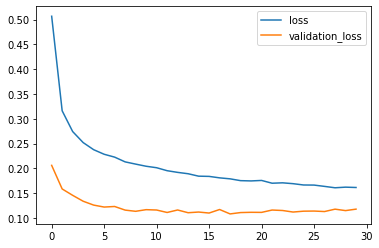

In [ ]:
plt.plot(report.history['loss'], label="loss")
plt.plot(report.history['val_loss'], label="validation_loss")
plt.legend()

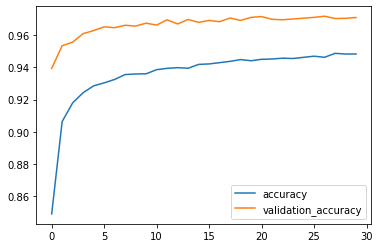

In [ ]:
plt.plot(report.history['accuracy'], label="accuracy")
plt.plot(report.history['val_accuracy'], label="validation_accuracy")
plt.legend()

In [ ]:
print("Train eval: ", model.evaluate(X_train, y_train))
print("Test eval: ", model.evaluate(X_test, y_test))


1875/1875 [==============================] - 3s 2ms/step - loss: 0.0493 - accuracy: 0.9848
Train eval:  [0.0492866076529026, 0.9848499894142151]
313/313 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.9710
Test eval:  [0.11809713393449783, 0.9710000157356262]


In [ ]:
y_pred = model.predict(X_test).argmax(axis=1)

In [ ]:
print(y_test.shape)
print(y_pred.shape)

(10000,)
(10000,)


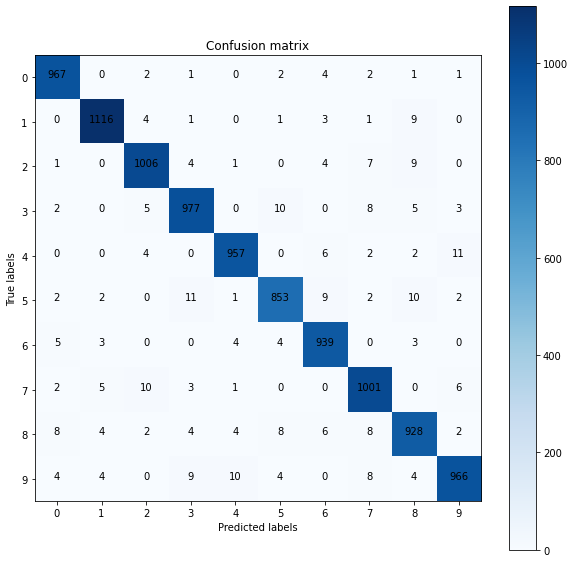

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,10))
plt.imshow(cm, cmap=plt.cm.Blues)
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i,j], 'd'),
           horizontalalignment = 'center',
           color='black')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(list(range(10)))
plt.yticks(list(range(10)))
plt.title('Confusion matrix')
plt.colorbar()
plt.show()


Text(0.5, 1.0, 'Predicted = 9, Real = 8')

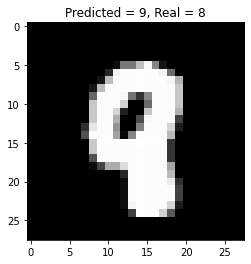

In [ ]:
misshits = np.where(y_pred!=y_test)[0]
index = np.random.choice(misshits)
plt.imshow(X_test[index].reshape(28,28), cmap='gray')
plt.title("Predicted = " + str(y_pred[index]) + ", Real = " + str(y_test[index]))